In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X=df.iloc[:,0:4]
y=df.iloc[:,4]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y1=le.fit_transform(y)
Y=pd.get_dummies(y1).values #converting categorical to binary

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0) #spliting data

In [ ]:
model= Sequential() #model declaration
model.add(Dense(4,input_shape=(4,), activation='relu')) # 4 because input=4 columns
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1=model.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.1)

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2143 - accuracy: 0.9800 - val_loss: 0.2330 - val_accuracy: 0.9167
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9700 - val_loss: 0.2362 - val_accuracy: 0.9167
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.9700 - val_loss: 0.2358 - val_accuracy: 0.9167
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9700 - val_loss: 0.2272 - val_accuracy: 0.9167
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9700 - val_loss: 0.2321 - val_accuracy: 0.9167
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9700 - val_loss: 0.2297 - val_accuracy: 0.9167
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9700 - val_loss: 0.2249 - val_accuracy: 0.9167
Epoch 8/100
1

<Figure size 432x288 with 0 Axes>

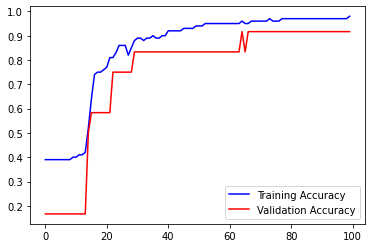

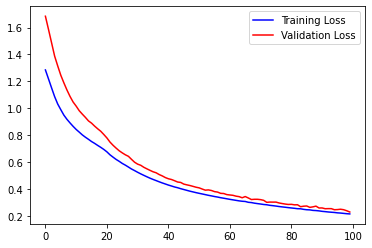

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']
epochs=range(len(acc))

import matplotlib.pyplot as plt
#Training and validation accuracy per epoch
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.figure()

In [ ]:
y_pred=model.predict(X_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n",classification_report(y_test_class,y_pred_class))
print("Confusion Matrix: \n", confusion_matrix(y_test_class,y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38

Confusion Matrix: 
 [[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
